# **Deep Learning** _Day 120_
##### Name: Muhammad Hassaan
##### Date: August 28, 2024
##### Email: muhammadhassaan7896@gmail.com

# **GRU for Time Series Prediction**

In this notebook, we'll explore the use of Gated Recurrent Units (GRUs) for time series prediction. GRUs are a type of recurrent neural network (RNN) that are well-suited for processing sequential data. They are particularly effective for tasks where the order of data points matters, such as time series forecasting. We'll walk through the process of preparing time series data, building a GRU-based model, and evaluating its performance on predicting future values. This hands-on guide will provide a clear understanding of how GRUs can be leveraged in practical time series prediction scenarios.

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense  # Note the change to GRU here
from sklearn.preprocessing import MinMaxScaler

## Data Preparation
First, let's load and visualize the Airline Passengers dataset.

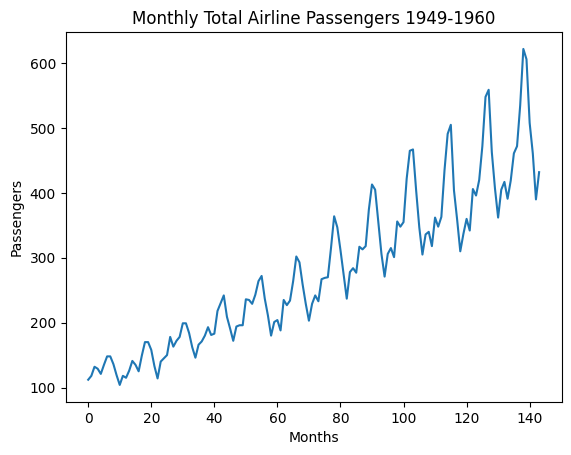

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataframe = pd.read_csv(url, usecols=[1], engine='python')
plt.plot(dataframe)
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.title("Monthly Total Airline Passengers 1949-1960")
plt.show()

## Data Preprocessing
Before training a GRU model, we need to preprocess our data. This involves scaling our data and converting it into the right shape.

In [3]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataframe.values.astype('float32'))

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

## Create Dataset Matrix
This utility function creates a dataset matrix. Given data, and choosing a certain time step, it will create input-output pairs.

In [4]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1, choosing a timestep of 3
look_back = 3
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## GRU Model Building & Training

In [6]:
%%time
# Create and fit the GRU network
model = Sequential()
model.add(GRU(4, input_shape=(look_back, 1)))  # Change LSTM to GRU here
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

c:\Users\muham\miniconda3\envs\tf_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0032
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0034
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0030
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0021
Epoch 13/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0030
Epoch 14/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0026
Epoch 15/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033
Ep

## Model Evaluation

In [7]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

# Calculate root mean squared error
trainScore = np.sqrt(((trainPredict-y_train)**2).mean())
testScore = np.sqrt(((testPredict-y_test)**2).mean())
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score: 96.95 RMSE
Test Score: 104.19 RMSE


## Visualizing Predictions

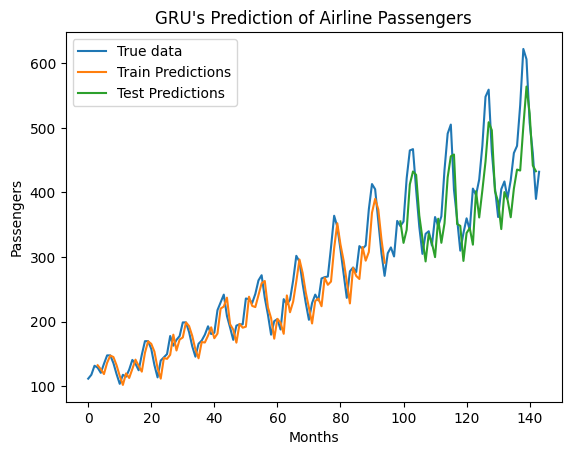

In [8]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="True data")
plt.plot(trainPredictPlot, label="Train Predictions")
plt.plot(testPredictPlot, label="Test Predictions")
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.title("GRU's Prediction of Airline Passengers")
plt.legend()
plt.show()